In [3]:
import os, yaml, json
from pathlib import Path
from tqdm.notebook import tqdm
if '_fixed' not in locals():
    _fixed = os.chdir(os.path.dirname(os.getcwd()))
from ludwig import repo_root
import yfinance as yf
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
apikeys = yaml.safe_load(open(repo_root() / 'assets' / 'api_keys.yml'))

'ALPHAVANTAGE_API_KEY' in apikeys

True

In [5]:
# babel briefings: 8.8.2020 - 29.11.2021
# 6 months before and after
data_start = '2020-08-08'
data_end = '2021-11-29'
start = '2020-02-01'
end = '2022-05-31'

In [6]:
tk = yf.Ticker('MSFT')
hist = tk.history(start=start, end=end)
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-03 00:00:00-05:00,162.122965,165.994594,162.094428,165.880447,30107000,0.0,0.0
2020-02-04 00:00:00-05:00,168.505907,171.835311,167.716360,171.340652,36433300,0.0,0.0
2020-02-05 00:00:00-05:00,175.060111,175.221823,169.714043,171.131409,39186300,0.0,0.0
2020-02-06 00:00:00-05:00,172.149245,174.860337,171.283596,174.679596,27751400,0.0,0.0
2020-02-07 00:00:00-05:00,173.937578,176.582074,173.585602,174.926880,33529100,0.0,0.0


In [22]:
import pandas_datareader.data as web
import datetime

# Define the start and end dates for the data
start = '2020-02-01'
end = '2022-05-31'

# 	Dow Jones Industrial Average	^DJI
# NASDAQ Composite	^IXIC
# S&P/TSX Composite (Canada)	^TSX
# BOVESPA (Brazil)	^BVP
# Europe	FTSE 100 (UK)	^FTM
# DAX (Germany)	^DAX
# CAC 40 (France)	^CAC
# Euro Stoxx 50	^STOXX50E
# Asia-Pacific	Nikkei 225 (Japan)	^NKX
# Hang Seng (Hong Kong)	^HSI
# SSE Composite (Shanghai)	^SHC
# S&P/ASX 200 (Australia)	^AOR

indices = ['^SPX', '^DJI', '^NDQ', '^TSX', '^BVP', '^FTM', '^DAX', '^CAC', '^STOXX50E', '^NKX', '^HSI', '^SHC', '^AOR']

index_key = indices[-3]
index_key = random.choice(indices)
# index_key = 'BITCOIN'
index_key = '^NDQ'
# index_key = 'MSFT'
# index_key = 'BTCUSD'
print(f'Fetching data for {index_key}')
    
# Fetch the S&P 500 data from Stooq
# Note: Stooq uses '^SPX' for the S&P 500 index
stock_data = web.DataReader(index_key, 'stooq', start, end)

# Stooq returns data in descending order, so you may want to sort it
stock_data = stock_data.sort_index()

# Display the last 5 rows
print(stock_data.tail(10))

Fetching data for ^NDQ
                Open      High       Low     Close      Volume
Date                                                          
2022-05-17  11905.57  11988.43  11754.28  11984.52  3088842074
2022-05-18  11790.68  11826.23  11381.69  11418.15  3134617667
2022-05-19  11364.40  11562.82  11313.31  11388.50  3250511713
2022-05-20  11542.68  11552.21  11035.69  11354.62  3457729380
2022-05-23  11396.28  11552.07  11304.56  11535.27  2906145315
2022-05-24  11326.45  11351.61  11092.48  11264.45  2901316358
2022-05-25  11225.03  11511.90  11211.85  11434.74  2818108022
2022-05-26  11409.84  11796.97  11406.16  11740.65  2891882374
2022-05-27  11869.69  12131.66  11856.82  12131.13  2947121576
2022-05-31  12137.54  12190.09  11942.50  12081.39  3587091309


In [71]:
pct = stock_data['Close'].pct_change()
pct.describe()

count    586.000000
mean       0.001041
std        0.022039
min       -0.147472
25%       -0.009269
50%        0.000969
75%        0.012308
max        0.142218
Name: Close, dtype: float64

In [11]:
# unemployment_rate = web.DataReader('UNRATE', 'fred', start, end)
# treasure_yield = web.DataReader('DGS10', 'fred', start, end)
# fed_funds = web.DataReader('FEDFUNDS', 'fred', start, end)

keys = ['UNRATE', 'DFF', 'DGS10', 'FEDFUNDS']
key = keys[2]
key = 'VIXCLS'
# key = 'BTC-USD'

fed_indicator = web.DataReader(key, 'fred', start, end)
# fed_indicator['value'] = fed_indicator[key]#.pct_change()
# fed_indicator['pct_change'] = fed_indicator['value'].pct_change()

print(fed_indicator.tail())

            VIXCLS
DATE              
2022-05-25   28.37
2022-05-26   27.50
2022-05-27   25.72
2022-05-30   26.54
2022-05-31   26.19


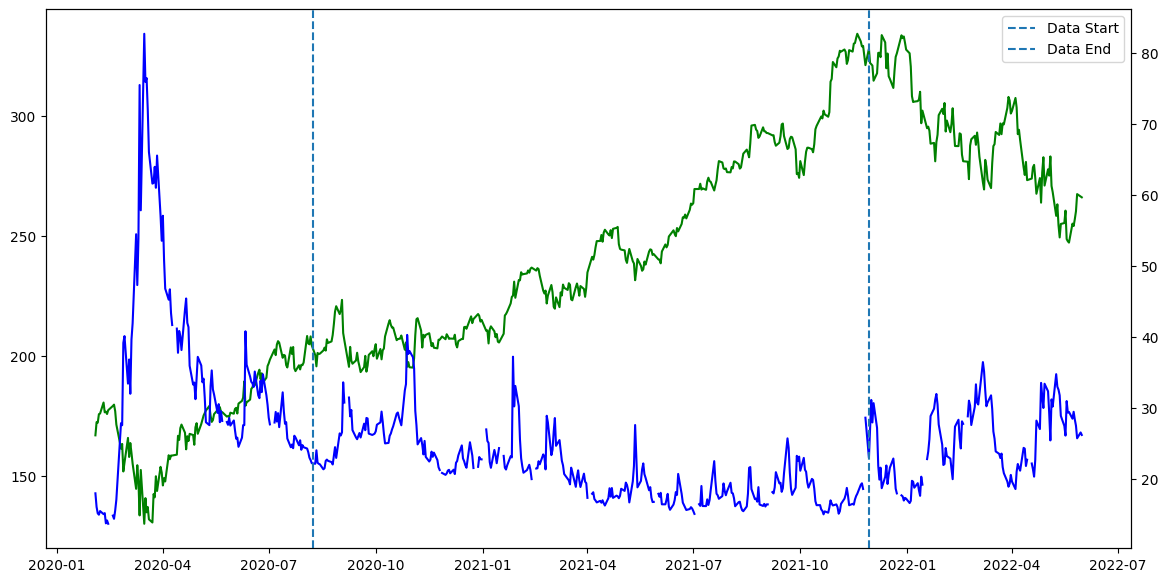

In [15]:
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()
ax1.plot(stock_data.index, stock_data['Close'], 'g-')
# ax2.plot(unemployment_rate.index, unemployment_rate['UNRATE'], 'b-')
ax2.plot(fed_indicator.index, fed_indicator, 'b-')

# plot data start and end
plt.axvline(pd.to_datetime(data_start), linestyle='--', label='Data Start')
plt.axvline(pd.to_datetime(data_end), linestyle='--', label='Data End')
plt.legend();

In [ ]:
key = 'BTC-USD'

data = web.DataReader(key, 'yahoo', start, end)
# fed_indicator['value'] = fed_indicator[key]#.pct_change()
# fed_indicator['pct_change'] = fed_indicator['value'].pct_change()

print(data.tail())

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/BTC-USD/history?period1=1580526000&period2=1654048799&interval=1d&frequency=1d&filter=history
Response Text:
b'<html><meta charset=\'utf-8\'>\n<script>\nif(window != window.top){\ndocument.write(\'<p>Content is currently unavailable.</p><img src="//geo.yahoo.com/p?s=1197757039&t=\'\n    + new Date().getTime() + \'&_R=\'\n    + encodeURIComponent(document.referrer)\n    + \'&err=404\'\n    + \'" width="0px" height="0px"/>\');\n}else{\nwindow.location.replace(\'https://\' + window.location.host + \'/?err=404\');\n}\n</script>\n<noscript>\n<META http-equiv="refresh" content="0;URL=https://finance.yahoo.com/?err=404">\n</noscript></html>'

In [79]:
url = 'https://finance.yahoo.com/quote/BTC-USD/history?period1=1580526000&period2=1654048799&interval=1d&frequency=1d&filter=history'

import requests

raw = requests.get(url).text
raw

'Edge: Too Many Requests'

In [10]:
import pandas_datareader.data as web
import datetime as dt
import os


# Define the crypto ticker and the currency
ticker = 'BTCUSD'

try:
    # Use the 'av-daily' data source for daily crypto data
    bitcoin_data = web.DataReader(ticker, 'av-daily', start, end, api_key=apikeys['ALPHAVANTAGE_API_KEY'])
    
    print(f"Successfully fetched daily data for {ticker}:")
    print(bitcoin_data.tail())

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please check that your API key is correct and pasted as a string.")

Successfully fetched daily data for BTCUSD:
                  open        high         low       close  volume
2022-05-27  29257.7234  29365.0213  28250.3875  28593.9261   54207
2022-05-28  28594.3360  29238.5276  28444.8000  29005.5109   34952
2022-05-29  29006.6343  29523.0868  28813.3422  29443.4067   34565
2022-05-30  29445.1422  31998.1263  29272.5706  31716.7465   72507
2022-05-31  31689.5839  32303.1075  31191.0089  31776.8853   40247


In [6]:
root = Path(r'C:\Users\anwan\workspace\local_data\babel-briefings-v1-anon')
paths = list(root.rglob('*.json'))
len(paths)

54

In [ ]:
# full = [json.load(path.open('r')) for path in tqdm(paths)]
# len(full)

  0%|          | 0/54 [00:00<?, ?it/s]

54

In [2]:
# full[0][0]

In [ ]:
df = pd.DataFrame([{'ID': art['ID'], **inst} 
       for i, path in enumerate(paths) 
       for art in tqdm(json.load(path.open('r')), desc=f'{path.stem} ({i+1}/{len(paths)})') 
       for inst in art['instances']])
len(df)

1/54:   0%|          | 0/106094 [00:00<?, ?it/s]

2/54:   0%|          | 0/119033 [00:00<?, ?it/s]

3/54:   0%|          | 0/110272 [00:00<?, ?it/s]

4/54:   0%|          | 0/133481 [00:00<?, ?it/s]

5/54:   0%|          | 0/96124 [00:00<?, ?it/s]

6/54:   0%|          | 0/67223 [00:00<?, ?it/s]

7/54:   0%|          | 0/135463 [00:00<?, ?it/s]

8/54:   0%|          | 0/127445 [00:00<?, ?it/s]

9/54:   0%|          | 0/52450 [00:00<?, ?it/s]

10/54:   0%|          | 0/91555 [00:00<?, ?it/s]

11/54:   0%|          | 0/91184 [00:00<?, ?it/s]

12/54:   0%|          | 0/108769 [00:00<?, ?it/s]

13/54:   0%|          | 0/70647 [00:00<?, ?it/s]

14/54:   0%|          | 0/96996 [00:00<?, ?it/s]

15/54:   0%|          | 0/72760 [00:00<?, ?it/s]

16/54:   0%|          | 0/100561 [00:00<?, ?it/s]

17/54:   0%|          | 0/119481 [00:00<?, ?it/s]

18/54:   0%|          | 0/119940 [00:00<?, ?it/s]

19/54:   0%|          | 0/82324 [00:00<?, ?it/s]

20/54:   0%|          | 0/73509 [00:00<?, ?it/s]

21/54:   0%|          | 0/131252 [00:00<?, ?it/s]

22/54:   0%|          | 0/101041 [00:00<?, ?it/s]

23/54:   0%|          | 0/67794 [00:00<?, ?it/s]

24/54:   0%|          | 0/123754 [00:00<?, ?it/s]

25/54:   0%|          | 0/129005 [00:00<?, ?it/s]

26/54:   0%|          | 0/118475 [00:00<?, ?it/s]

27/54:   0%|          | 0/83090 [00:00<?, ?it/s]

28/54:   0%|          | 0/34719 [00:00<?, ?it/s]

29/54:   0%|          | 0/40006 [00:00<?, ?it/s]

30/54:   0%|          | 0/91643 [00:00<?, ?it/s]

31/54:   0%|          | 0/89593 [00:00<?, ?it/s]

32/54:   0%|          | 0/68681 [00:00<?, ?it/s]

33/54:   0%|          | 0/98976 [00:00<?, ?it/s]

34/54:   0%|          | 0/104031 [00:00<?, ?it/s]

35/54:   0%|          | 0/46804 [00:00<?, ?it/s]

36/54:   0%|          | 0/52153 [00:00<?, ?it/s]

37/54:   0%|          | 0/77055 [00:00<?, ?it/s]

38/54:   0%|          | 0/116904 [00:00<?, ?it/s]

39/54:   0%|          | 0/108365 [00:00<?, ?it/s]

40/54:   0%|          | 0/54601 [00:00<?, ?it/s]

41/54:   0%|          | 0/80040 [00:00<?, ?it/s]

42/54:   0%|          | 0/113395 [00:00<?, ?it/s]

43/54:   0%|          | 0/26269 [00:00<?, ?it/s]

44/54:   0%|          | 0/86838 [00:00<?, ?it/s]

45/54:   0%|          | 0/44178 [00:00<?, ?it/s]

46/54:   0%|          | 0/33026 [00:00<?, ?it/s]

47/54:   0%|          | 0/43057 [00:00<?, ?it/s]

48/54:   0%|          | 0/90708 [00:00<?, ?it/s]

49/54:   0%|          | 0/122724 [00:00<?, ?it/s]

50/54:   0%|          | 0/97008 [00:00<?, ?it/s]

51/54:   0%|          | 0/65610 [00:00<?, ?it/s]

52/54:   0%|          | 0/92497 [00:00<?, ?it/s]

53/54:   0%|          | 0/47374 [00:00<?, ?it/s]

54/54:   0%|          | 0/63222 [00:00<?, ?it/s]

7419089

In [ ]:
# parse dates
df['date'] = pd.to_datetime(df['collectedAt'])

In [11]:
df.head()

,ID,collectedAt,location,category,date
0,12436,2020-08-08T10:03:00Z,ae,general,2020-08-08 10:03:00+00:00
1,12541,2020-08-08T10:03:00Z,ae,general,2020-08-08 10:03:00+00:00
2,12568,2020-08-08T10:03:00Z,ae,general,2020-08-08 10:03:00+00:00
3,12795,2020-08-08T10:03:00Z,ae,general,2020-08-08 10:03:00+00:00
4,12795,2020-08-08T10:22:00Z,ae,entertainment,2020-08-08 10:22:00+00:00


<Axes: title={'center': 'Number of Articles per Day'}, xlabel='date'>

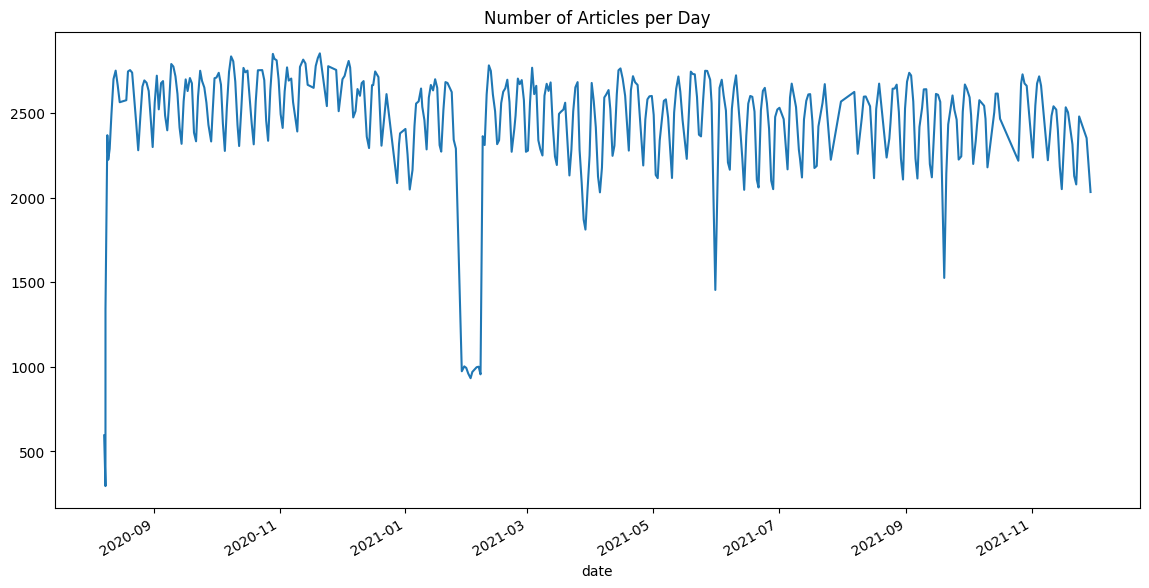

In [12]:
# plot number of business articles every day
df[df['category'] == 'business']['date'].value_counts().sort_index().plot(figsize=(14, 7), title='Number of Articles per Day')

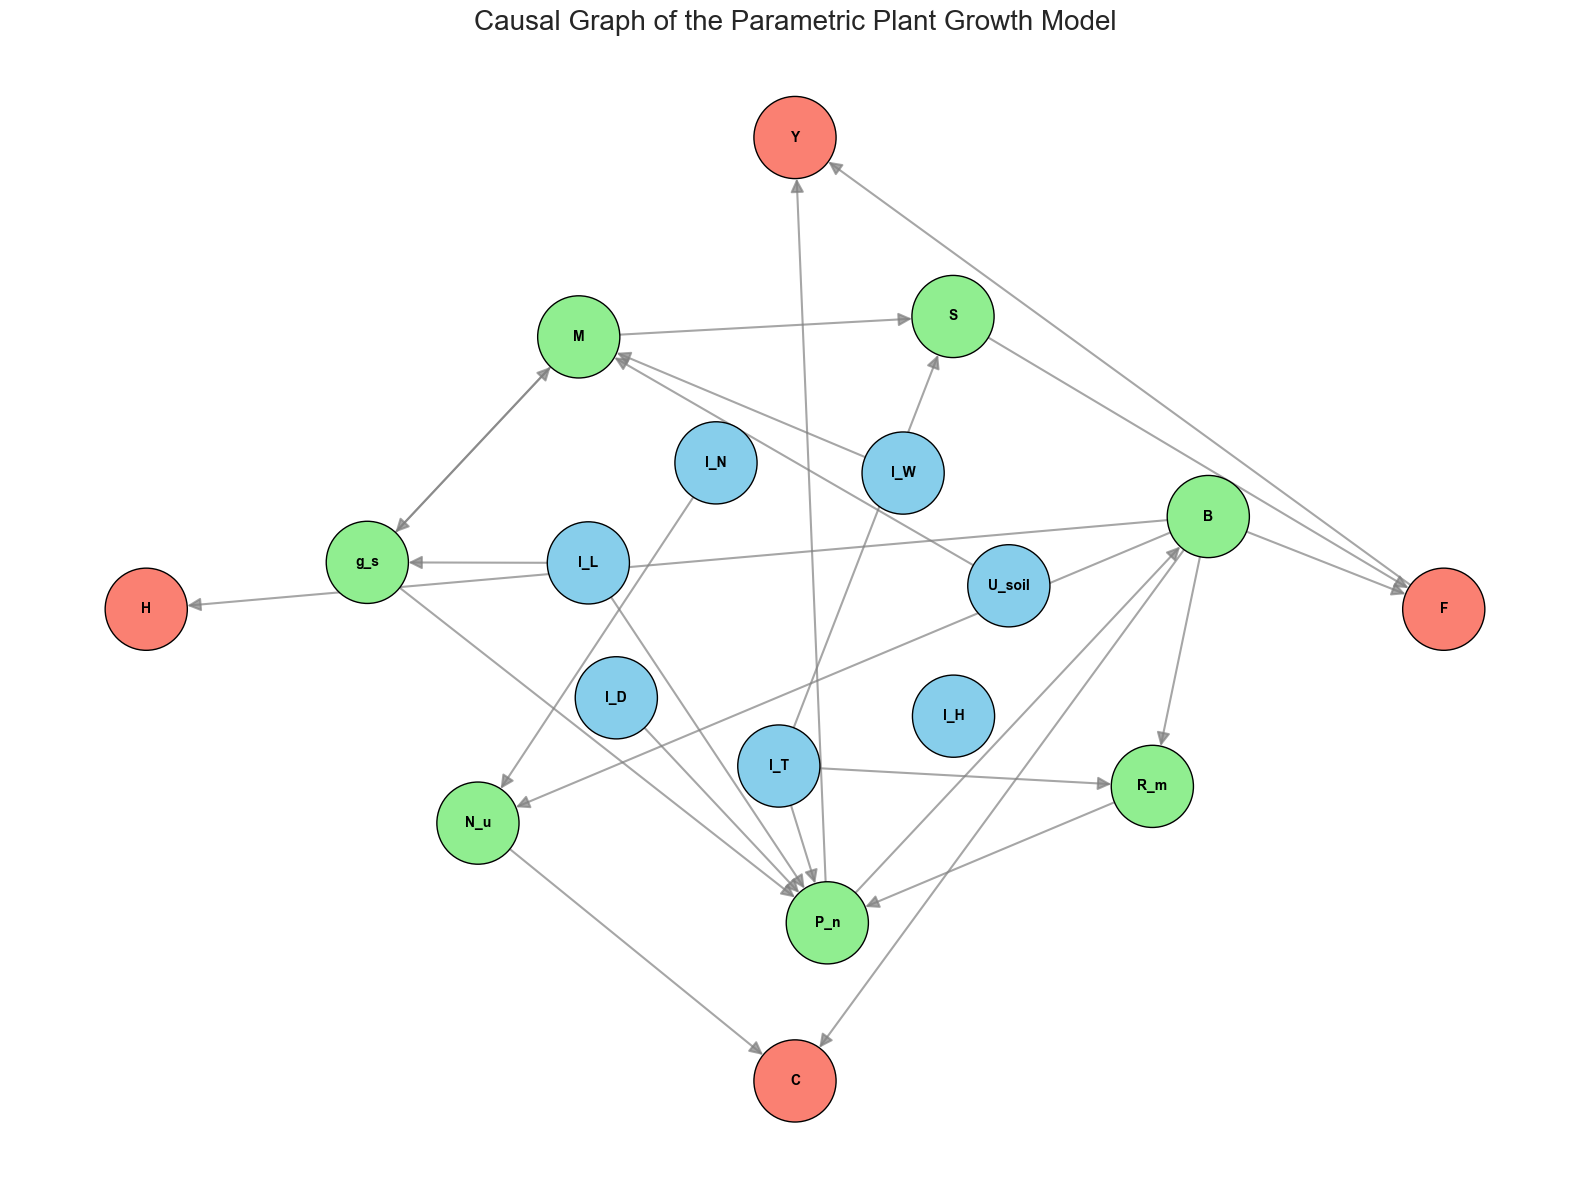

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create a directed graph object
G = nx.DiGraph()

# 2. Define nodes, categorized by type for coloring
# (Using shorter names for better visualization)
inputs = {
    "I_W": "Water", "I_N": "Nutrients", "I_L": "Light Intensity",
    "I_D": "Light Duration", "I_T": "Temperature", "I_H": "Humidity",
    "U_soil": "Soil Type"
}
internal_states = {
    "M": "Soil Moisture", "g_s": "Stomata", "N_u": "Nutrient Uptake",
    "P_n": "Photosynthesis", "R_m": "Respiration", "B": "Biomass", "S": "Stress"
}
outputs = {
    "H": "Height", "C": "Leaf Color", "F": "Flowering", "Y": "Yield"
}

# Add all nodes to the graph
all_nodes = list(inputs.keys()) + list(internal_states.keys()) + list(outputs.keys())
G.add_nodes_from(all_nodes)

# 3. Define the edges based on the structural equations
# (Parent -> Child)
edges = [
    # Environmental influences
    ("I_W", "M"), ("U_soil", "M"),
    # Stomatal Conductance
    ("M", "g_s"), ("I_L", "g_s"),
    # Transpiration affects moisture (feedback)
    ("g_s", "M"),
    # Nutrient Uptake
    ("I_N", "N_u"), ("B", "N_u"),
    # Photosynthesis & Respiration
    ("I_L", "P_n"), ("I_D", "P_n"), ("I_T", "P_n"), ("g_s", "P_n"), # Gross Photosynthesis part
    ("B", "R_m"), ("I_T", "R_m"), # Respiration part
    ("R_m", "P_n"), # Respiration subtracted from gross photosynthesis
    # Biomass accumulation
    ("P_n", "B"),
    # Stress
    ("M", "S"), ("I_T", "S"),
    # Observable Outcomes
    ("B", "H"),
    ("N_u", "C"), ("B", "C"),
    ("B", "F"), ("S", "F"),
    ("F", "Y"), ("P_n", "Y")
]
G.add_edges_from(edges)

# 4. Plotting the graph
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 12))

# Use a spring layout for positioning the nodes
# A seed ensures the layout is reproducible
# pos = nx.spring_layout(G, k=0.9, iterations=50, seed=42)
# Use a shell layout to better separate inputs, states, and outputs
pos = nx.shell_layout(G, nlist=[list(inputs.keys()), list(internal_states.keys()), list(outputs.keys())])

# Define colors for each node type
color_map = []
for node in G:
    if node in inputs:
        color_map.append('skyblue')
    elif node in internal_states:
        color_map.append('lightgreen')
    elif node in outputs:
        color_map.append('salmon')

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=3500, node_color=color_map, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7, edge_color='gray', arrowsize=20, node_size=3500)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')


# Customize and show the plot
ax.set_title("Causal Graph of the Parametric Plant Growth Model", fontsize=20)
fig.tight_layout()
plt.axis('off')
plt.show()